# Deep learning et régressions

## Régressions avec réseaux denses et SKlearn

In [22]:
# Directive pour afficher les graphiques dans Jupyter
%matplotlib inline
# Pandas : librairie de manipulation de données
# NumPy : librairie de calcul scientifique
# MatPlotLib : librairie de visualisation et graphiques
# SeaBorn : librairie de graphiques avancés
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics

In [23]:
#lecture des ensembles d'apprentissage et de test
data_train=pd.read_csv("boston_train.csv")
data_test=pd.read_csv("boston_test.csv")

Y_train = data_train.MV
X_train = data_train.drop(['MV'], axis=1)
Y_test = data_test.MV
X_test = data_test.drop(['MV'], axis=1)

In [24]:
# Importation de la librairie "neural networks" de sklearn pour la régression
from sklearn.neural_network import MLPRegressor

In [25]:
# Création d'un réseau dense avec 3 couches cachées de 11, 7 et 5 neurones
mlr =  MLPRegressor(hidden_layer_sizes=(11,7,5))

In [26]:
mlr.fit(X_train, Y_train)            # apprentissage
Y_pred = mlr.predict(X_test)         # prédiction sur l'ensemble de test

D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5,1,'Prix reels vs predictions')

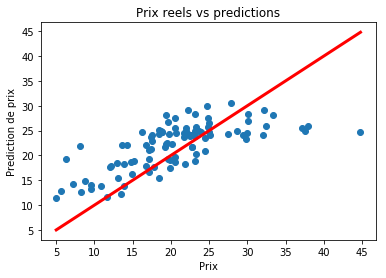

In [27]:
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()], color='red', linewidth=3)
plt.xlabel("Prix")
plt.ylabel("Prediction de prix")
plt.title("Prix reels vs predictions")

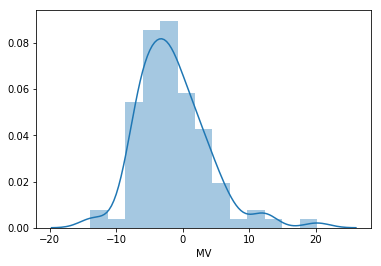

In [28]:
sns.distplot(Y_test-Y_pred)

In [29]:
from sklearn import metrics
print(metrics.mean_squared_error(Y_test, Y_pred))

30.2729479402


In [30]:
scoreR2 = metrics.r2_score(Y_test, Y_pred)
print(scoreR2)

0.44189058376


### Exercice : tester plusieurs possibilités de couches cachées

### Exercice : tester les réseaux de neurones sur le dataset des maisons de King County

## Régressions avec Keras

In [31]:
# Importation des modèles standard (dense) sous Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [32]:
X_train = X_train.as_matrix()
X_test = X_test.as_matrix()

In [33]:
# Création du modèle

model = Sequential()
model.add(Dense(11, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))

In [34]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [35]:
model.fit(X_train, Y_train, nb_epoch=200, batch_size=10)

C:\Users\qkame\AppData\Roaming\Python\Python36\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/200
392/392 [==============================] - 0s - loss: 412.1727      
Epoch 2/200
392/392 [==============================] - 0s - loss: 92.6470     
Epoch 3/200
392/392 [==============================] - 0s - loss: 72.4561     
Epoch 4/200
392/392 [==============================] - 0s - loss: 61.4316     
Epoch 5/200
392/392 [==============================] - 0s - loss: 52.4598     
Epoch 6/200
392/392 [==============================] - 0s - loss: 45.7384     
Epoch 7/200
392/392 [==============================] - 0s - loss: 43.4712     
Epoch 8/200
392/392 [==============================] - 0s - loss: 42.2393     
Epoch 9/200
392/392 [==============================] - 0s - loss: 41.2057     
Epoch 10/200
392/392 [==============================] - 0s - loss: 39.9072     
Epoch 11/200
392/392 [==============================] - 0s - loss: 40.1108     
Epoch 12/200
392/392 [==============================] - 0s - loss: 38.5467     
Epoch 13/200
392/392 [=========================

392/392 [==============================] - 0s - loss: 21.8590     
Epoch 104/200
392/392 [==============================] - 0s - loss: 22.3192     
Epoch 105/200
392/392 [==============================] - 0s - loss: 24.0975     
Epoch 106/200
392/392 [==============================] - 0s - loss: 22.6506    
Epoch 107/200
392/392 [==============================] - 0s - loss: 22.8707     
Epoch 108/200
392/392 [==============================] - 0s - loss: 22.5172    
Epoch 109/200
392/392 [==============================] - 0s - loss: 21.7311     
Epoch 110/200
392/392 [==============================] - 0s - loss: 21.8201     
Epoch 111/200
392/392 [==============================] - 0s - loss: 22.0693     
Epoch 112/200
392/392 [==============================] - 0s - loss: 21.3697     
Epoch 113/200
392/392 [==============================] - 0s - loss: 21.6427    
Epoch 114/200
392/392 [==============================] - 0s - loss: 22.6849     
Epoch 115/200
392/392 [======================

In [36]:
Y_pred = model.predict(X_test,batch_size=10,verbose=1)

10/98 [==>...........................] - ETA: 0s

In [37]:
print(metrics.mean_squared_error(Y_test, Y_pred))

16.0888558266


Text(0.5,1,'Prix reels vs predictions')

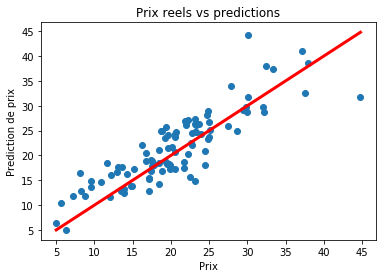

In [38]:
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()], color='red', linewidth=3)
plt.xlabel("Prix")
plt.ylabel("Prediction de prix")
plt.title("Prix reels vs predictions")

### Exercice : tester Keras sur le dataset des maisons de King County